# Проведение и анализ А/B-теста для интернет-магазина

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Описание данных

**Файл `hypothesis.csv`**
- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

**Файл `orders.csv`**
- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

**Файл `visitors.csv`**
- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

## План проекта

- Загрузка и предобработка данных
- Приоритизация гипотез
  1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
  2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
  3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.
- Анализ A/B-теста <br>
  Этапы анализа:
   1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
   2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
   3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
   4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
   5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
   6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
   7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
   8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
   9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
   10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
   11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
   12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
   13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
   
- Общий вывод <br>
    Примем решение по результатам теста и объясним его. Варианты решений:
       1. Остановить тест, зафиксировать победу одной из групп.
       2. Остановить тест, зафиксировать отсутствие различий между группами.
       3. Продолжить тест.

## Загрузка и предобработка данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from math import sqrt
from scipy import stats as st
import datetime as dt

In [2]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

Считаем данные из csv-файла в датафреймы и сохраним в переменные: hypothesis, orders, visitors.

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
    orders = pd.read_csv('/datasets/orders.csv') 
    visitors = pd.read_csv('/datasets/visitors.csv') 
except:
    hypothesis = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/Принятие решений в бизнесе/hypothesis.csv') 
    orders = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/Принятие решений в бизнесе/orders.csv') 
    visitors = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/Принятие решений в бизнесе/visitors.csv') 

Выведем основную информацию о датафреймах

In [4]:
# напишем функцию для обзора данных:
def print_primary_info(df):
    print("\nПервичная информация о датафрейме")
    print("Количество записей:", df.shape[0])
    print("Количество столбцов:", df.shape[1])
    print("\nПервые 10 строк:")
    display(df.head(10))
    print("Информация о типах данных: \n")
    print(df.info())
    print("\nПропуски:")
    display(df.isna().sum())
    print("Процент пропусков от всего датафрейма:")
    display(df.isna().mean().sort_values(ascending=False)*100)
    print("Дубликаты:")
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')    

In [5]:
#информация о датафрейме hypothesis:
print_primary_info(hypothesis)


Первичная информация о датафрейме
Количество записей: 9
Количество столбцов: 5

Первые 10 строк:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Информация о типах данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Пропуски:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Процент пропусков от всего датафрейма:


Hypothesis   0.000
Reach        0.000
Impact       0.000
Confidence   0.000
Efforts      0.000
dtype: float64

Дубликаты:
Дубликатов НЕТ


Типы данных верные. Приведём название столбцов к хорошему стилю.

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [7]:
#информация о датафрейме orders:
print_primary_info(orders)


Первичная информация о датафрейме
Количество записей: 1197
Количество столбцов: 5

Первые 10 строк:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Информация о типах данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Пропуски:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Процент пропусков от всего датафрейма:


transactionId   0.000
visitorId       0.000
date            0.000
revenue         0.000
group           0.000
dtype: float64

Дубликаты:
Дубликатов НЕТ


Приведём название столбцов к хорошему стилю.

In [8]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [9]:
#информация о датафрейме visitors:
print_primary_info(visitors)


Первичная информация о датафрейме
Количество записей: 62
Количество столбцов: 3

Первые 10 строк:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Информация о типах данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Пропуски:


date        0
group       0
visitors    0
dtype: int64

Процент пропусков от всего датафрейма:


date       0.000
group      0.000
visitors   0.000
dtype: float64

Дубликаты:
Дубликатов НЕТ


Измененим тип данных в столбцах с датами в `orders` and `visitors`:

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# проверка
print(orders['date'].dtypes)
print(visitors['date'].dtypes)

datetime64[ns]
datetime64[ns]


### Промежуточный вывод

- Привели название столбцов к хорошему стилю.
- Изменили тип данных в столбцах, содержащих информацию о дате и времени.
- Данные полные и достаточны для исследования.

## Приоритизация гипотез

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.<br>
Применим метод приоритезации гипотез - ICE (от. англ.: Impact, Confidence, Effort/ Влияние, Уверенность, Усилия).

In [11]:
# создаем новый столбец ice
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Топ-5 гипотез по методу ICE:
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head())

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000


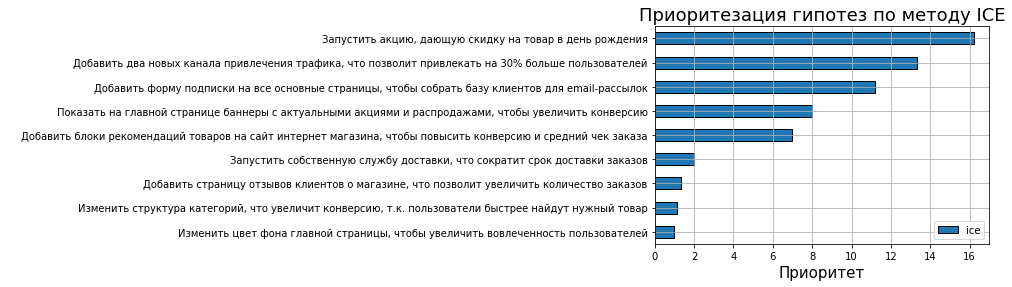

In [12]:
ax = hypothesis[['hypothesis', 'ice']].sort_values(by=['ice']) \
                                      .set_index('hypothesis') \
                                      .plot(kind='barh', ec='black', grid=True)
ax.set_xlabel('Приоритет', size=15)
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE', size=18)
plt.show()

**Вывод:** Вывели 5 самых приоритетных гипотиз по методу ICE. На перврм месте - "Запустить акцию, дающую скидку на товар в день рождения".

Применим метод приоритезации гипотез - RICE(R от англ. reach, «охват»):

In [13]:
# создаем новый столбец rice
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Топ-5 гипотез по методу RICE:
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head())

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200


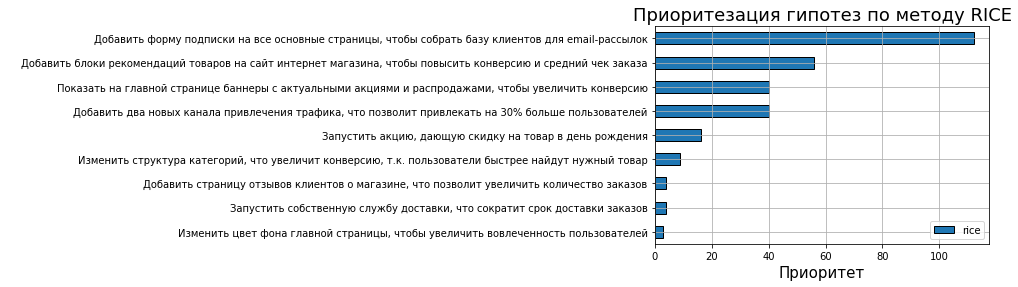

In [14]:
ax = hypothesis[['hypothesis', 'rice']].sort_values(by=['rice']) \
                                      .set_index('hypothesis') \
                                      .plot(kind='barh', ec='black', grid=True)
ax.set_xlabel('Приоритет', size=15)
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE', size=18)
plt.show()

**Вывод:** Вывели 5 самых приоритетных гипотиз по методу RICE. На первом месте с большим отрывом - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Промежуточный вывод

Мы убедились в эффективности приоритезации гипотез по методам ICE и RICE. Один компонент, *efforts*, влияет обратно пропорционально: чем меньше усилий требуется для реализации гипотезы, тем лучше. Остальные компоненты (*impact, confidence, efforts* и *reach* для RICE) влияют прямо пропорционально: чем выше их значение, тем лучше.<br>
Методы ICE и RICE похожи, но выбор между ними существенно влияет на приоритезацию гипотез. Если нам важна широкая аудитория, выбираем RICE. Если этот компонент не важен или его сложно оценить, используем ICE.

## Анализ A/B-теста

Результаты A/B-теста, описаны в файлах *orders.csv* и *visitors.csv*.

Для начала проверим корректность распределения на группы A и B:

In [15]:
print('Кол-во посетителей в группе А: ', visitors[visitors['group']=='A']['visitors'].sum())
print('Кол-во посетителей в группе B: ', visitors[visitors['group']=='B']['visitors'].sum())

print('Кол-во покупок в группе A: ', len(orders[orders['group']=='A']))
print('Кол-во покупок в группе B: ', len(orders[orders['group']=='B']))

results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'],\
                        visitors[visitors['group']=='B']['visitors'])
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима.')
else:
    print('Разница в количестве посетителей в группах A и B статистически не значима.')

Кол-во посетителей в группе А:  18736
Кол-во посетителей в группе B:  18916
Кол-во покупок в группе A:  557
Кол-во покупок в группе B:  640
p-значение:  0.7301376549390499
Разница в количестве посетителей в группах A и B статистически не значима.


Проверим группы на совпадение пользователей:

In [16]:
visitor_id_a = orders[orders['group'] == 'A']['visitor_id']
visitor_id_b = orders[orders['group'] == 'B']['visitor_id']
matching_users = orders.query('visitor_id in @visitor_id_a and visitor_id in @visitor_id_b')

display(matching_users['visitor_id'].unique())

print('Количество совпадающих пользователей в группах:', matching_users['visitor_id'].nunique())
print('Всего пользователей:', orders['visitor_id'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество совпадающих пользователей в группах: 58
Всего пользователей: 1031


In [17]:
display(matching_users)
display(matching_users['revenue'].describe())

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


count      181.000
mean     8,612.901
std     14,161.551
min         50.000
25%      1,530.000
50%      3,460.000
75%      8,439.000
max     93,940.000
Name: revenue, dtype: float64

Количество совпадающих пользователей в группах составляет 58, это 5,6% от общего числа пользователей. Поскольку таких пользователей немного, их можно удалить для корректного анализа А/В теста.

In [18]:
orders = orders.query('visitor_id not in @matching_users["visitor_id"]')
print('Всего пользователей в тесте осталось:', orders['visitor_id'].nunique())

Всего пользователей в тесте осталось: 973


**Поэтапно проанализируем А/В-тест:**
1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясним его. Варианты решений:
       1. Остановить тест, зафиксировать победу одной из групп.
       2. Остановить тест, зафиксировать отсутствие различий между группами.
       3. Продолжить тест.

### График кумулятивной выручки по группам

Создаём датафреймы с уникальными агрегироваными кумулятивными данными по каждой таблице:

In [19]:
# создаем массив уникальных пар значений дат и групп теста
data_groups = orders[['date', 'group']].drop_duplicates()  

# получаем агрегированные кумулятивные данные о заказах по дням 
orders_aggregated = data_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные данные о посетителях по дням 
visitors_aggregated = data_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# переименум столбцы
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


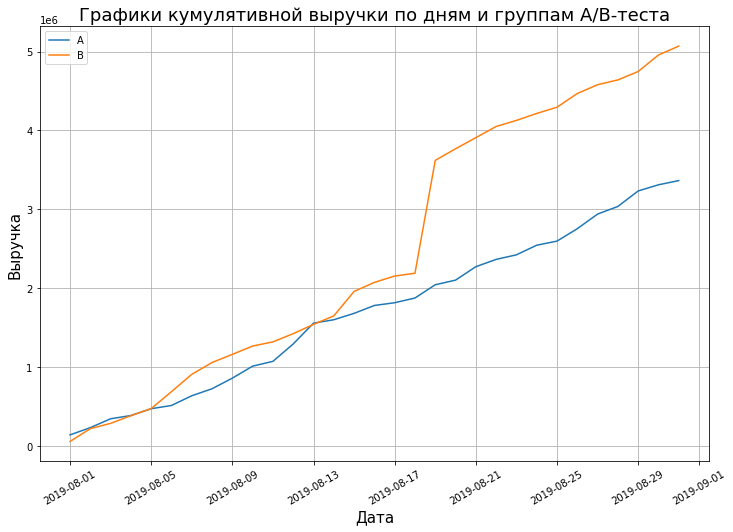

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

# размер графика
plt.figure(figsize=(12, 8))

# график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-теста', fontsize=18)
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=30)
plt.ylabel('Выручка', fontsize=15)
plt.legend() 
plt.show()

**Вывод:** 
- Кумулятивная выручка группы А растет линейно и меньше, чем у группы В. 
- В группе В наблюдается резкий скачок 18-19 августа, что может свидетельствовать о всплесках числа заказов или появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

Разделим кумулятивную выручку на кумулятивное число заказов по каждой группе:

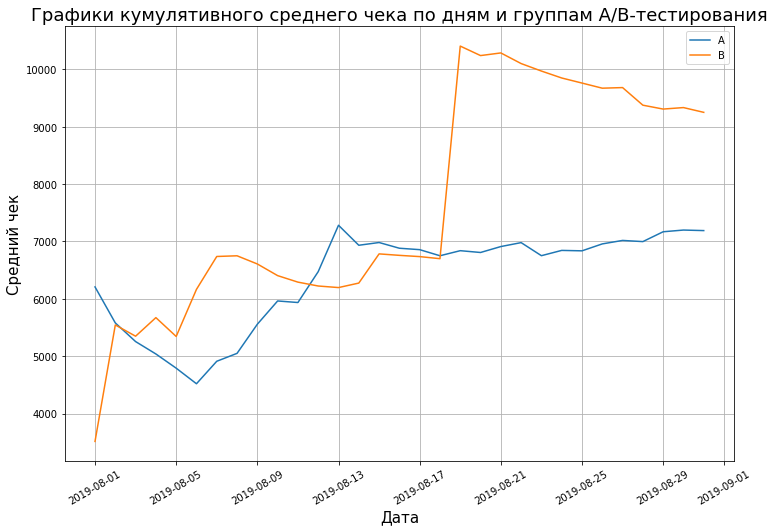

In [21]:
# размер графика
plt.figure(figsize=(12, 8))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=18)
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=30)
plt.ylabel('Средний чек', fontsize=15)
plt.legend() 
plt.show()

**Вывод:**<br>
На графиках наблюдаем:
- В первой половине теста графики нестабильны, с сильными ростами и падениями.
- В группе В наблюдается резкий скачок 18-19 августа, что указывает на присутствие аномальных значений.
- К концу периода кумулятивный средний чек группы B выше, чем у группы А.
- К концу периода у группы А наблюдается тенденция к росту, а у B — к снижению.

### График относительного изменения кумулятивного среднего чека

Для начала объеденим таблицы с кумулятивной выручкой:

In [22]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
                            cumulative_revenue_b,
                            left_on='date',
                            right_on='date',
                            how='left',
                            suffixes=['_a', '_b'])
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


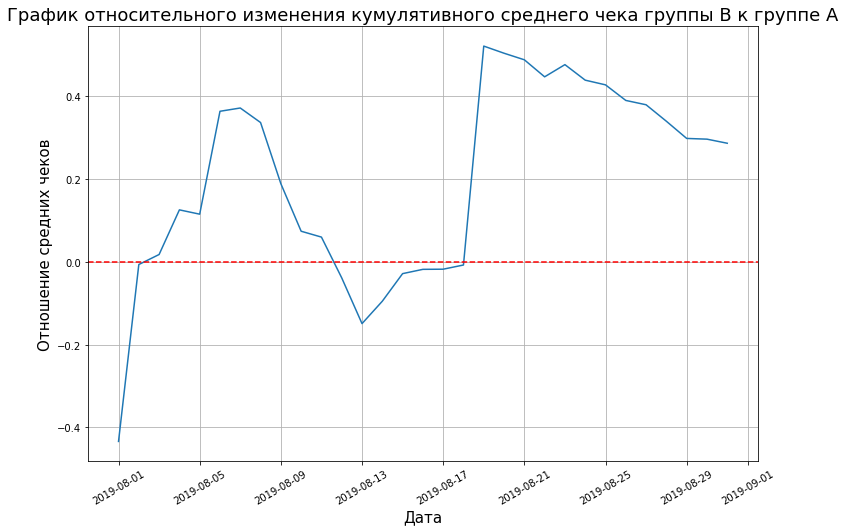

In [23]:
# размер графика
plt.figure(figsize=(12, 8))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
        (merged_cumulative_revenue['revenue_b']/
         merged_cumulative_revenue['orders_b'])/
        (merged_cumulative_revenue['revenue_a']/
         merged_cumulative_revenue['orders_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=30)
plt.ylabel('Отношение средних чеков', fontsize=15)
plt.show()

**Вывод:** На графике видны резкие скачки, что может указывать на дорогие заказы в пиковые дни.

### График кумулятивной конверсии по группам

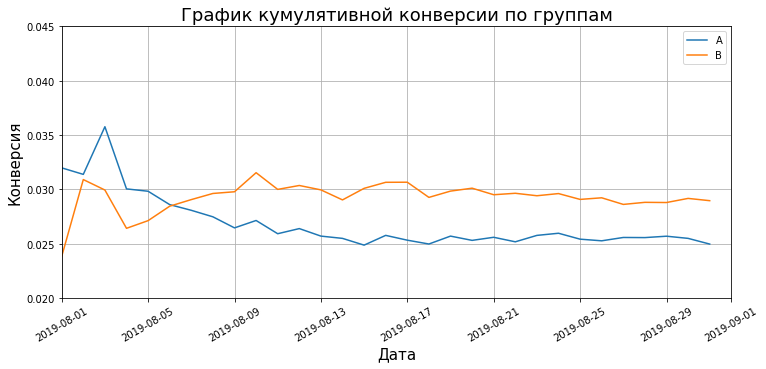

In [24]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# размер графика
plt.figure(figsize=(12, 5))
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.045])

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
 
plt.grid(visible=True)
plt.title('График кумулятивной конверсии по группам', fontsize=18)
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=30)
plt.ylabel('Конверсия', fontsize=15)
plt.legend()
plt.show()

**Вывод:** В начале теста конверсия обеих групп колеблется. На девятый день конверсия выровнялась, при этом у группы В она выше, чем у группы А.

### График относительного изменения кумулятивной конверсии группы B к группе A

Для начала объеденим таблицы с конверсиями:

In [25]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b'])
 
merged_cumulative_conversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.032,0.024
1,2019-08-02,0.031,0.031
2,2019-08-03,0.036,0.030
3,2019-08-04,0.030,0.026
4,2019-08-05,0.030,0.027


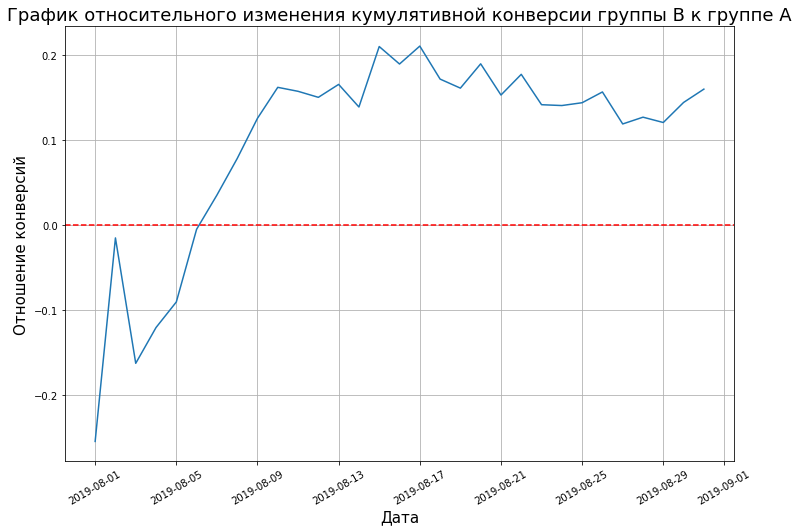

In [26]:
# размер графика
plt.figure(figsize=(12, 8))

# cтроим отношение конверсий
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b']/
         merged_cumulative_conversions['conversion_a']-1)


# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=18)
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=30)
plt.ylabel('Отношение конверсий', fontsize=15)
plt.show()

**Вывод:** В начале теста группа В проигрывала, но затем на протяжении 10 дней наблюдался рост, который к концу теста немного снизился.

### Точечный график количества заказов по пользователям

Создадим таблицу *orders_by_users* с колличеством заказов по каждому пользователю:

In [27]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .sort_values(by='transaction_id', ascending=False)
    .rename(columns={'transaction_id': 'orders'})
)
display(orders_by_users.head(10))
display(orders_by_users['orders'].describe())

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


count   973.000
mean      1.044
std       0.238
min       1.000
25%       1.000
50%       1.000
75%       1.000
max       3.000
Name: orders, dtype: float64

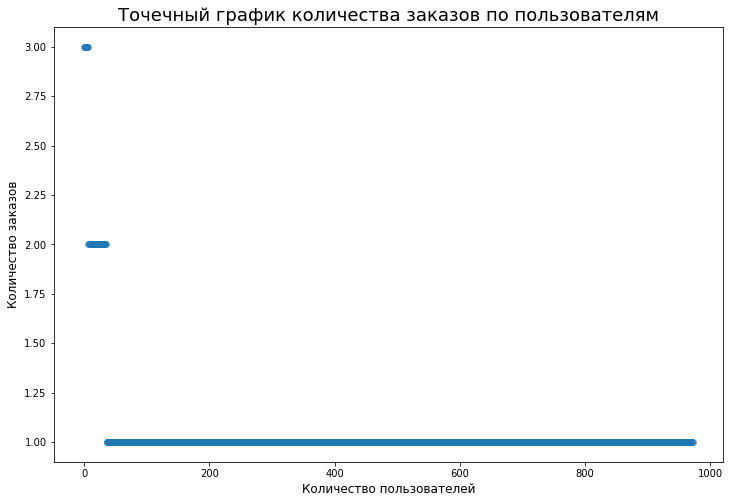

In [28]:
# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders_by_users)))

# размер графика  
plt.figure(figsize=(12,8)) 

#строим точечный график 
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5)  
 
plt.ylabel('Количество заказов', fontsize=12) 
plt.xlabel('Количество пользователей', fontsize=12) 
plt.title('Точечный график количества заказов по пользователям', fontsize=18) 
plt.show() 

**Вывод:** Большинство пользователей совершили один заказ, небольшое количество 7 пользователей — три заказа.

### 95-й и 99-й перцентили количества заказов на пользователя

Методом `np.percentile('column', [percentile1, percentile2, percentile3])` находим 95-й и 99-й перцентили:

In [29]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

**Вывод:** Не более 1% пользователей совершили более двух заказов. Выберем 2 заказа на пользователя как верхнюю границу, а большее количество будем считать аномальным.

### Точечный график стоимостей заказов

Топ-10 заказов по стоимости:

In [30]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


In [31]:
orders['revenue'].describe()

count       1,016.000
mean        8,300.815
std        42,121.992
min            50.000
25%         1,190.000
50%         2,955.000
75%         8,134.250
max     1,294,500.000
Name: revenue, dtype: float64

Самый большой заказ по стоимости почти 1.3 миллиона, второй по стоимости - 202740.

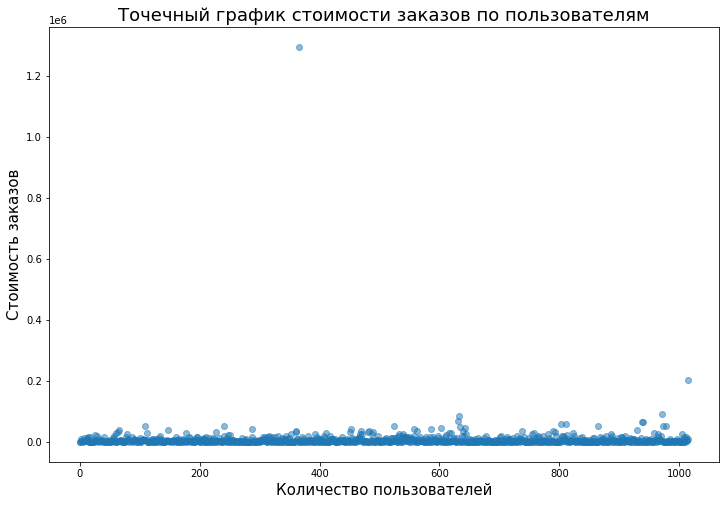

In [32]:
# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders['revenue'])))

# размер графика  
plt.figure(figsize=(12,8)) 

#строим точечный график 
plt.scatter(x_values, orders['revenue'], alpha=0.5)  
 
plt.ylabel('Стоимость заказов', fontsize=15) 
plt.xlabel('Количество пользователей', fontsize=15) 
plt.title('Точечный график стоимости заказов по пользователям', fontsize=18) 
plt.show() 

По такому графику сложно что-нибудь разглядеть, уменьшим масштаб.

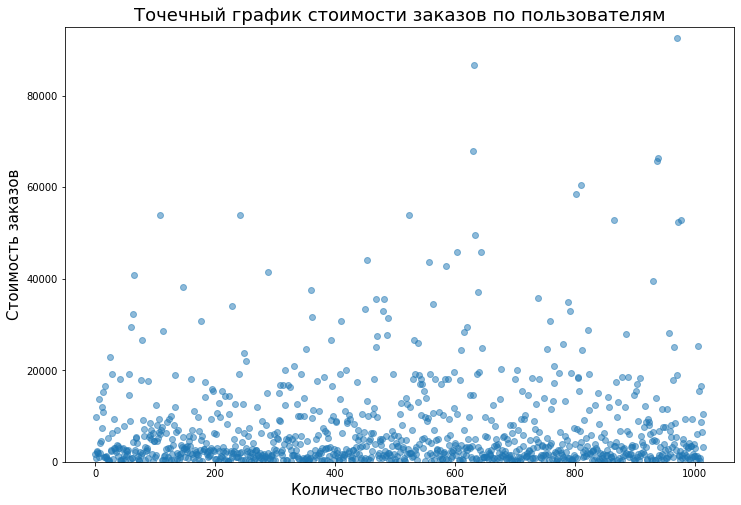

In [33]:
# размер графика  
plt.figure(figsize=(12,8))
plt.ylim(0, 95000)

#строим точечный график 
plt.scatter(x_values, orders['revenue'], alpha=0.5)  
 
plt.ylabel('Стоимость заказов', fontsize=15) 
plt.xlabel('Количество пользователей', fontsize=15) 
plt.title('Точечный график стоимости заказов по пользователям', fontsize=18) 
plt.show() 

**Вывод:** Основная масса заказов распределилась по стоимости в диапазоне от 0 до 20 тысяч.

### 95-й и 99-й перцентили стоимости заказов

Методом `np.percentile('column', [percentile1, percentile2, percentile3])` находим 95-й и 99-й перцентили:

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:** Не более 5% заказов более 26785, и не более 1% заказов — более 53904. Выберем стоимость заказа 30000 как верхнюю границу, а большую стоимость заказа будем считать аномальной.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных значений (количество заказов и стоимость заказа).<br>
Сформулируем гипотезы:
- Нулевая **Н0**: различий в количестве заказов между группами нет.
- Альтернативная **Н1**: различия в количестве заказов между группами есть.
- Коэффициент альфа: 0.05

Для расчета статистической значимости различий в конверсии между группами подготовим данные.<br>
Создадим новый датафрейм `data` со столбцами:
- *date* - дата;
- *orders_per_date_a* - количество заказов в выбранную дату в группе A;
- *revenue_per_date_a* - суммарная выручка в выбранную дату в группе A;
- *orders_per_date_b* - количество заказов в выбранную дату в группе B;
- *revenue_per_date_b* - суммарная выручка в выбранную дату в группе B;
- *orders_cummulative_a* - суммарное число заказов до выбранной даты включительно в группе A;
- *revenue_cummulative_a* - суммарная выручка до выбранной даты включительно в группе A;
- *orders_cummulative_b* - суммарное число заказов до выбранной даты включительно в группе B;
- *revenue_cummulative_b* - суммарная выручка до выбранной даты включительно в группе B;
- *visitors_per_date_a* - количество пользователей в выбранную дату в группе A;
- *visitors_cummulative_a* - количество пользователей до выбранной даты включительно в группе A;
- *visitors_per_date_b* - количество пользователей в выбранную дату в группе B;
- *visitors_cummulative_b* - количество пользователей до выбранной даты включительно в группе B.

In [35]:
# расчет количества пользователей в выбранную дату в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# расчет количества пользователей в выбранную дату в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# расчет количества заказов и суммарной выручки в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# расчет суммарного числа заказов до выбранной даты включительно в группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# расчет количества заказов и суммарной выручки в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# расчет суммарного числа заказов до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение датафреймов в один общий датафрейм data
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные `orders_by_users_a` и `orders_by_users_b` со столбцами `['visitor_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [37]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)

Посчитаем статистическую значимость различия конверсии по результатам теста Манна-Уитни.<br>
Выведем p-value для сравнения конверсии между группами.

In [38]:
# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(st.mannwhitneyu(sample_a, sample_b)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.011
Относительное различие в средней конверсии между группами по «сырым» данным: 0.160


**Вывод:** Число p-value = 0.011, что меньше 0.05. Нулевая гипотеза об отсутствии различий в конверсии между группами по «сырым» данным отвергается. Средняя конверсия группы В больше средней конверсии группы А.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:
- Нулевая **Н0**: различий в среднем чеке между группами нет.
- Альтернативная **Н1**: различия в среднем чеке между группами есть.
- Коэффициент альфа: 0.05

In [39]:
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(st.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
Относительное различие в среднем чеке между группами по «сырым» данным: 0.287


**Вывод:** p-value = 0.829, что больше 0.05. Следовательно, нет оснований отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Наблюдаемое различие в 28.7% не является статистически значимым, что указывает на наличие аномальных значений.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Очистим данные от аномальных значений.<br>
Ранее мы установили верхнюю границу по количеству заказов на пользователя равную 2 и верхнюю границу по стоимости заказа равную 30000.<br>
Введем переменные для обозначения границ аномалий.

In [40]:
# граница по количеству заказов:
many_orders = 2
# граница по стоимости заказа:
expensive_order = 30000

Объеденим пользователей с аномальными значениями в один датафрейм.

In [41]:
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_order]['visitor_id']
abnormal_users = (pd.concat([
    users_with_many_orders,
    users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print('\n')
print('Количество аномальных пользователей:', abnormal_users.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitor_id, dtype: int64


Количество аномальных пользователей: 49


Всего 49 аномальных пользователей. Проверим как они могли повлиять на результаты теста.

In [42]:
# отфильтрованные данные группы А:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)

# отфильтрованные данные группы В:
sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

Гипотезы:

- **Н0** - различий в конверсии между группами нет.
- **Н1** - различия в конверсии между группами есть.
- Коэффициент альфа: 0.05

In [43]:
# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «очищенным» данным:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.010
Относительное различие в средней конверсии между группами по «очищенным» данным: 0.187


**Вывод:**  Число p-value = 0.010, что меньше 0.05. Следовательно, нулевую гипотезу об отсутствии различий по «очищенным» данным в конверсии между группами отвергаем.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Гипотезы:

- **Н0** - различий в среднем чеке между группами нет.
- **Н1** - различия в среднем чеке между группами есть.
- Коэффициент альфа: 0.05

In [44]:
print('p-value =',
      '{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      '{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.741
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.027


**Вывод** Число p-value = 0.741, это значительно больше коэффициент альфа = 0.05. Следовательно, нет основания отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. По «сырым» данным p-value был равен 0.829. <br> 
Наблюдаемое различие в среднем чеке по группам не является статистичке значимым. По «очищенным» данным средний чек группы А немного больше среднего чека группы В (относительное различие в среднем чеке между группами по «очищенным» данным: -0.027). По «сырым» данным было наоборот, относительное различие в среднем чеке между группами составляло 0.287.

## Общий вывод

В задачи исследования входило:
   - Приоритизируйте гипотезы.
   - Запустите A/B-тест.
   - Проанализируйте результаты. 
   
В ходе изучения данных была выполнена предобработка:
- Привели название столбцов к хорошему стилю.
- Изменили тип данных в столбцах, содержащих информацию о дате и времени.

В ходе приоритезации гипотез по методам ICE и RICE выделили ТОП-5 гипотез:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
- Запустить акцию, дающую скидку на товар в день рождения.

Решение по результатам теста:<br>
**Тест стоит остановить.**

В ходе анвлиза результатов А/В-теста установили следуещее:
- График кумулятивной выручки наглядно демонстрирует, что кумулятивная выручка группы А увеличивается линейно и остается ниже, чем у группы В.
- График кумулятивного среднего чека по группам наглядно показывает, что к концу тестового периода кумулятивный средний чек группы B превышает показатели группы А. При этом у группы А наблюдается тенденция к росту, в то время как у группы B наблюдается снижение.
- График кумулятивной конверсии по группам наглядно демонстрирует, что конверсия у группы В немного выше, чем у группы А.
- Не более 1% пользователей совершили более двух заказов.
-  Не более 5% заказов более 26785, и не более 1% заказов — более 53904. 
- По «сырым» и по «очищенным» данным есть различия по количеству заказов (конверсии).
- По «сырым» и по «очищенным» данным статистически значимого различия в среднем чеке между группами не выявлено.

Исходя из вышеизложенного: Группа В превосходит группу А по количеству заказов (конверсии). И так как в среднем чеке по группам нет различий выручка в группе В растёт.
